### Global Female Labor Participation and U.S. Education Trends

This research examines global trends in female labor involvement as well as American educational developments. To find geographical and gender-specific trends in labor force participation, worldwide data is first analyzed. Turning its attention to American education, the study looks at how women's academic interests have changed over time in a variety of fields. The initiative seeks to shed light on changes in American women's educational attainment and the dynamics of the global workforce through statistical analysis, visual aids, and predictive modeling techniques like linear regression.

### Data Loading and Preparation:
This part loads a CSV file into a Pandas DataFrame, skips specified rows, drops selected columns, and cleans the data by removing rows with missing values for a specific year.


In [1]:
import pandas as pd

# Define the file path of the CSV
file_path = '/Users/rayenchouaibi/Desktop/projekt/ds1.csv'

# Load the CSV file into a DataFrame, skipping specified rows
data = pd.read_csv(file_path, skiprows=4)

# Print out the original column names to inspect
print("Original Columns:")
print(data.columns)

# Define the columns to drop 
columns_to_drop = list(data.columns[1:35])
last_two_columns = data.columns[-2:]

# Drop the specified columns from the DataFrame
data.drop(columns_to_drop, axis=1, inplace=True)

# Drop the last two columns
data.drop(last_two_columns, axis=1, inplace=True)

# Drop rows where '1990' column is empty
data.dropna(subset=["1991"], inplace=True)

# Display the updated DataFrame to inspect the data
print("\nUpdated DataFrame:")
print(data)

# Define the path to save the new CSV file
new_file_path = '/Users/rayenchouaibi/Desktop/projekt/updated_ds1.csv'

# Save the updated DataFrame to a new CSV file
#data.to_csv(new_file_path, index=False)

#print(f"\nUpdated DataFrame has been saved to {new_file_path}.")




Original Columns:
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

Updated DataFrame:
                    Country Name       1991       1992       1993       1994  \
1    Africa Eastern and Southern  65.432602  65.623617  65.740600  65.942926   
2                    Afghanistan  16.101000  16.170000  16.190000  16.204000   
3     Africa Western and Central  60.6237

### Summary Statistics and Visualization:

calculates summary statistics (mean participation rates), identifies countries with maximum and minimum participation rates for specified years, and visualizes trends over time.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated CSV file
file_path = '/Users/rayenchouaibi/Desktop/projekt/updated_ds1.csv'
data = pd.read_csv(file_path)



# Summary statistics
print("\nSummary statistics:")
print(data.describe())



Summary statistics:
             1991        1992        1993        1994        1995        1996  \
count  235.000000  235.000000  235.000000  235.000000  235.000000  235.000000   
mean    52.461259   52.606839   52.694501   52.931643   53.066098   53.189829   
std     17.495735   17.357572   17.259369   17.095988   17.078186   16.999385   
min      9.110000    9.144000    9.178000    9.209000    9.234000    9.264000   
25%     41.595000   41.992500   42.436500   43.539500   44.346500   44.072500   
50%     54.497649   54.921230   55.065000   55.184987   55.527000   55.653000   
75%     64.322000   64.387500   64.747500   64.319000   64.223500   64.117500   
max     91.093000   90.569000   89.953000   89.267000   88.602000   87.832000   

             1997        1998        1999        2000  ...        2013  \
count  235.000000  235.000000  235.000000  235.000000  ...  235.000000   
mean    53.353646   53.544875   53.772235   53.821744  ...   55.190428   
std     16.908743   16.7934

In [3]:
# Load the updated CSV file
file_path = '/Users/rayenchouaibi/Desktop/projekt/updated_ds1.csv'
data = pd.read_csv(file_path)

years_to_check = ['1991', '2001', '2011']

# Ensure numeric columns are treated as numeric
numeric_columns = data.columns[1:]  # Exclude 'Country Name'

# Convert numeric columns to numeric data type if needed
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the mean participation rate across countries for each year
mean_participation_rate = data[numeric_columns].mean()

# Initialize dictionaries to store results
max_participation_countries = {}
max_participation_rates = {}
min_participation_countries = {}
min_participation_rates = {}

# Find the country with the highest and lowest participation rate in the specified years
for year in years_to_check:
    max_country = data.loc[data[year].idxmax(), 'Country Name']
    max_rate = data[year].max()
    min_country = data.loc[data[year].idxmin(), 'Country Name']
    min_rate = data[year].min()

    max_participation_countries[year] = max_country
    max_participation_rates[year] = max_rate
    min_participation_countries[year] = min_country
    min_participation_rates[year] = min_rate

# Find the year with the highest average participation rate
max_participation_year = mean_participation_rate.idxmax()

# Print results
print("\nMean Participation Rate:")
print(mean_participation_rate)

for year in years_to_check:
    print(f"\nCountry with Maximum Participation Rate in {year}:")
    print(f"{max_participation_countries[year]}: {max_participation_rates[year]}%")

    print(f"\nCountry with Minimum Participation Rate in {year}:")
    print(f"{min_participation_countries[year]}: {min_participation_rates[year]}%")

print("\nYear with Maximum Average Participation Rate:")
print(max_participation_year)



Mean Participation Rate:
1991    52.461259
1992    52.606839
1993    52.694501
1994    52.931643
1995    53.066098
1996    53.189829
1997    53.353646
1998    53.544875
1999    53.772235
2000    53.821744
2001    53.892572
2002    53.932877
2003    54.067618
2004    54.170572
2005    54.362936
2006    54.501687
2007    54.620779
2008    54.704929
2009    54.805869
2010    54.771978
2011    54.896364
2012    55.105840
2013    55.190428
2014    55.379490
2015    55.662249
2016    55.860928
2017    56.013625
2018    56.148321
2019    56.395554
2020    55.374115
2021    56.196258
2022    56.701811
dtype: float64

Country with Maximum Participation Rate in 1991:
Burundi: 91.093%

Country with Minimum Participation Rate in 1991:
Iraq: 9.11%

Country with Maximum Participation Rate in 2001:
Tanzania: 86.164%

Country with Minimum Participation Rate in 2001:
West Bank and Gaza: 10.451%

Country with Maximum Participation Rate in 2011:
Madagascar: 85.289%

Country with Minimum Participation Ra

### Continental Trends Analysis:

Analyzes and plots labor force participation rate trends across selected countries from different continents.

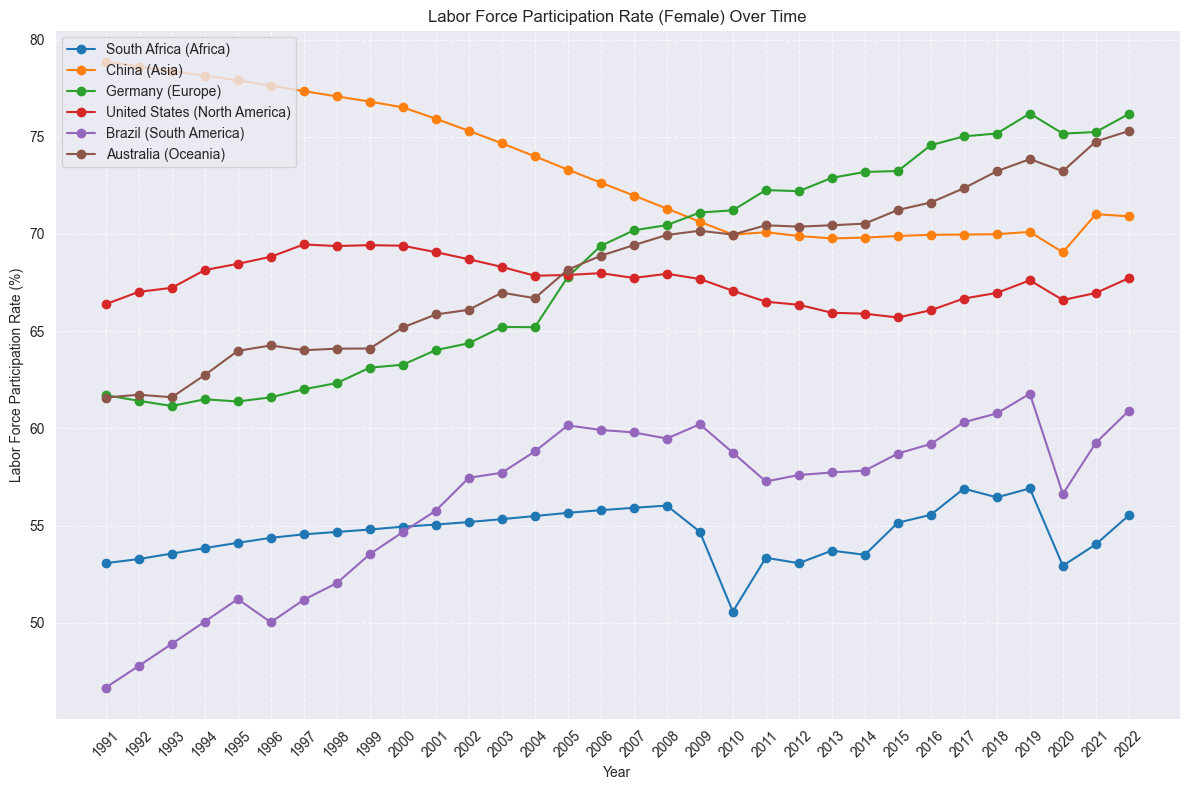

In [4]:
# Ensure numeric columns are treated as numeric
numeric_columns = data.columns[1:]  # Exclude 'Country Name'
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Select one country from each continent
countries_by_continent = {
    'Africa': 'South Africa',
    'Asia': 'China',
    'Europe': 'Germany',
    'North America': 'United States',
    'South America': 'Brazil',
    'Oceania': 'Australia'
}

# Plotting trends for selected countries
plt.figure(figsize=(12, 8))

# Define color palette for each continent
colors = {
    'Africa': 'tab:blue',
    'Asia': 'tab:orange',
    'Europe': 'tab:green',
    'North America': 'tab:red',
    'South America': 'tab:purple',
    'Oceania': 'tab:brown'
}

# Plot each country's data
for continent, country in countries_by_continent.items():
    country_data = data[data['Country Name'] == country]
    plt.plot(data.columns[1:], country_data.values.flatten()[1:], marker='o', linestyle='-',
             color=colors[continent], label=f"{country} ({continent})")

plt.title('Labor Force Participation Rate (Female) Over Time')
plt.xlabel('Year')
plt.ylabel('Labor Force Participation Rate (%)')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


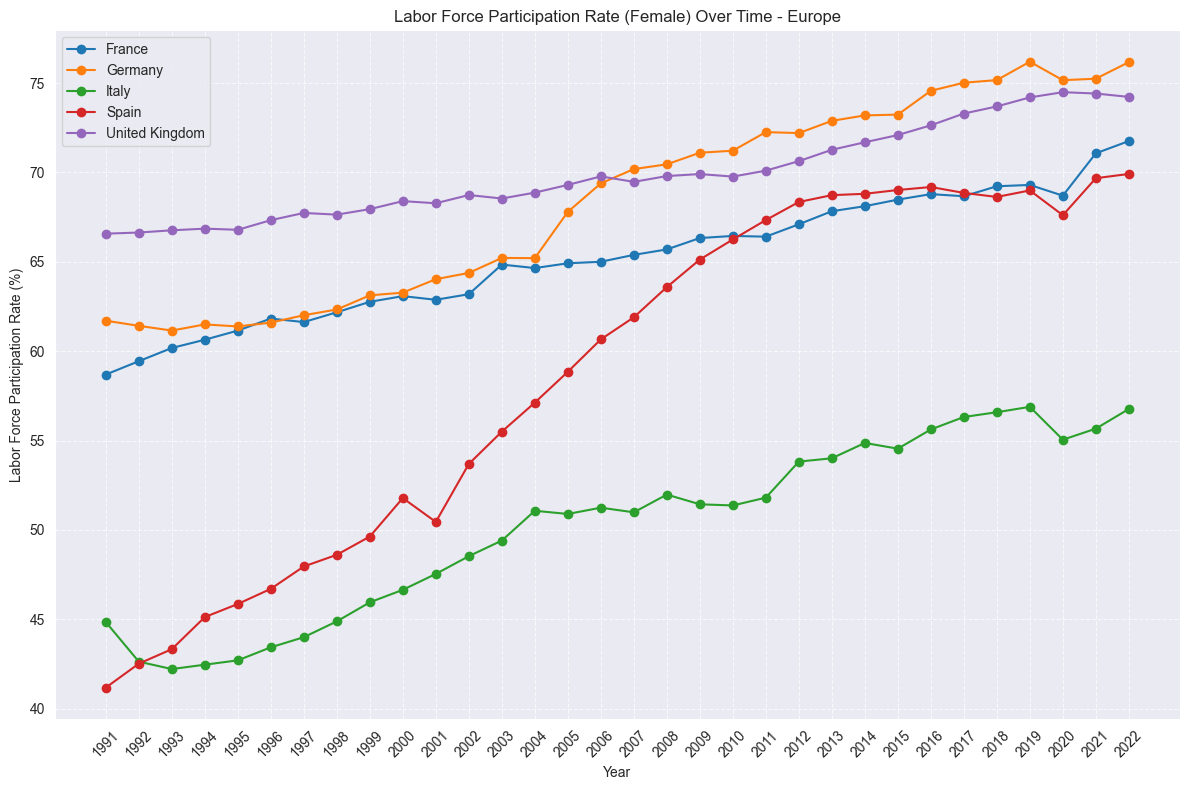

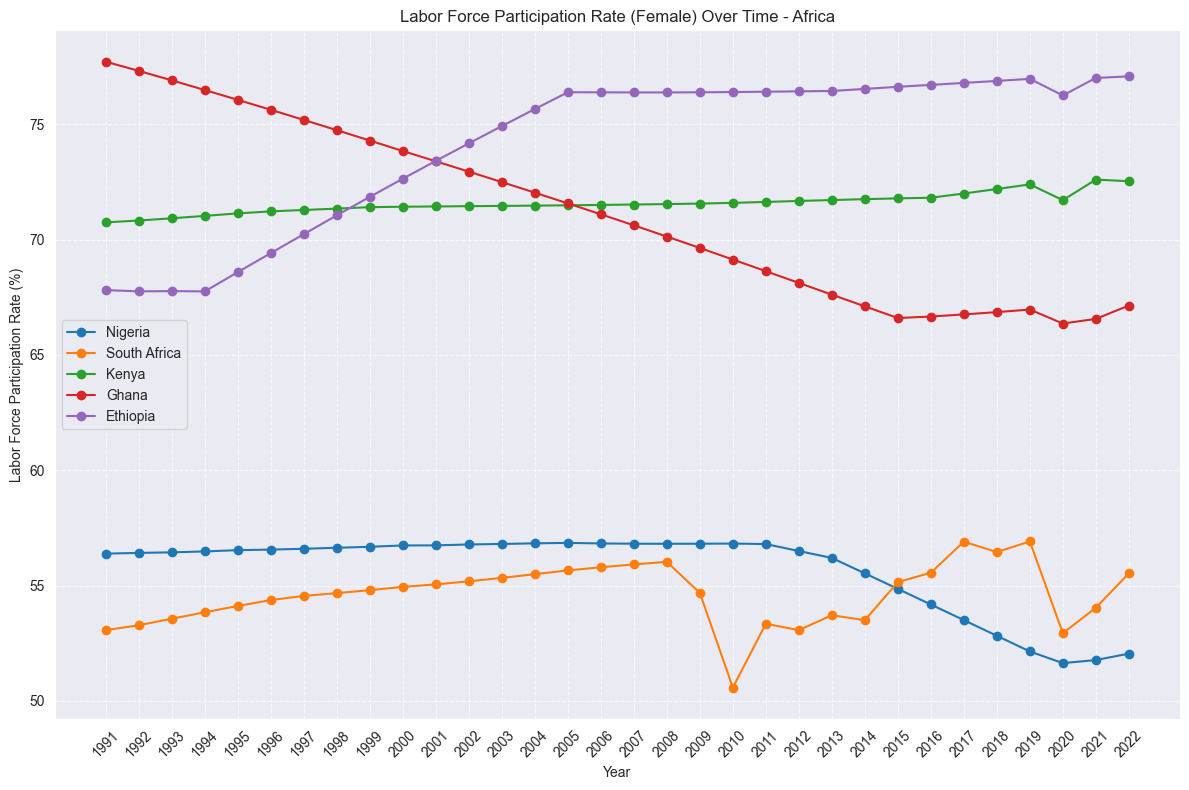

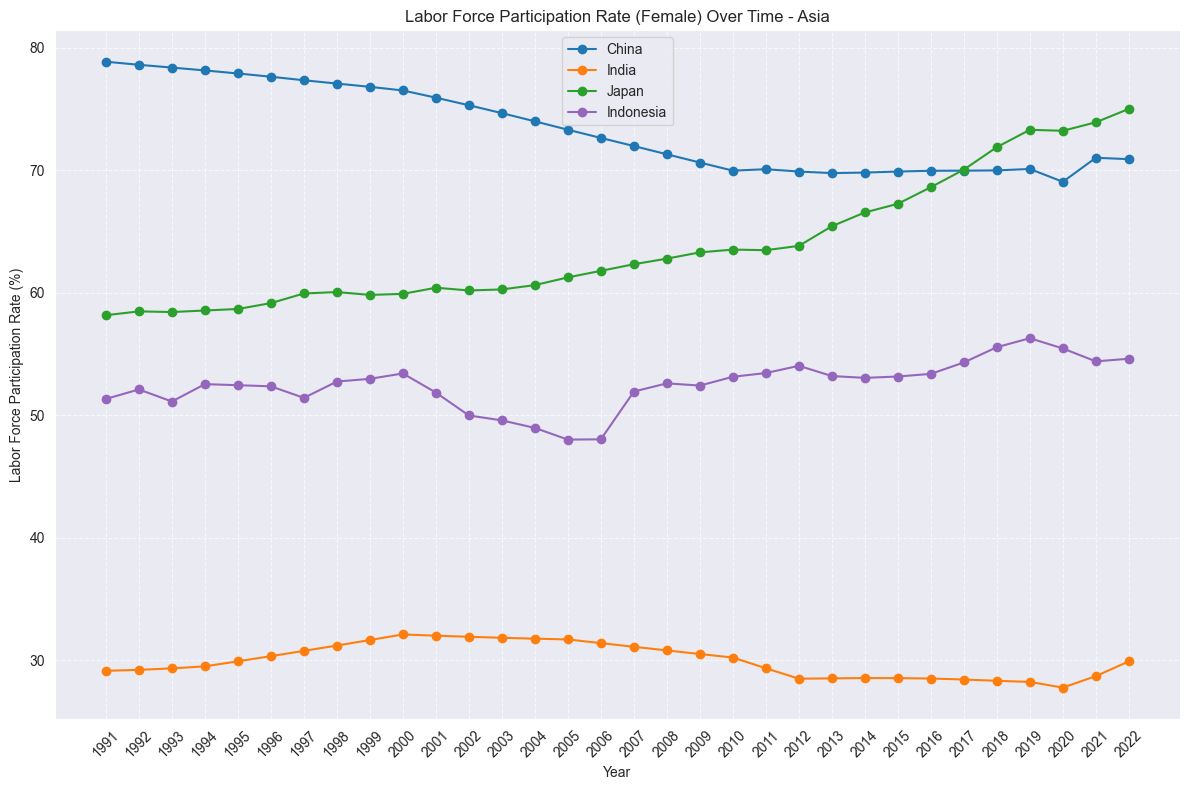

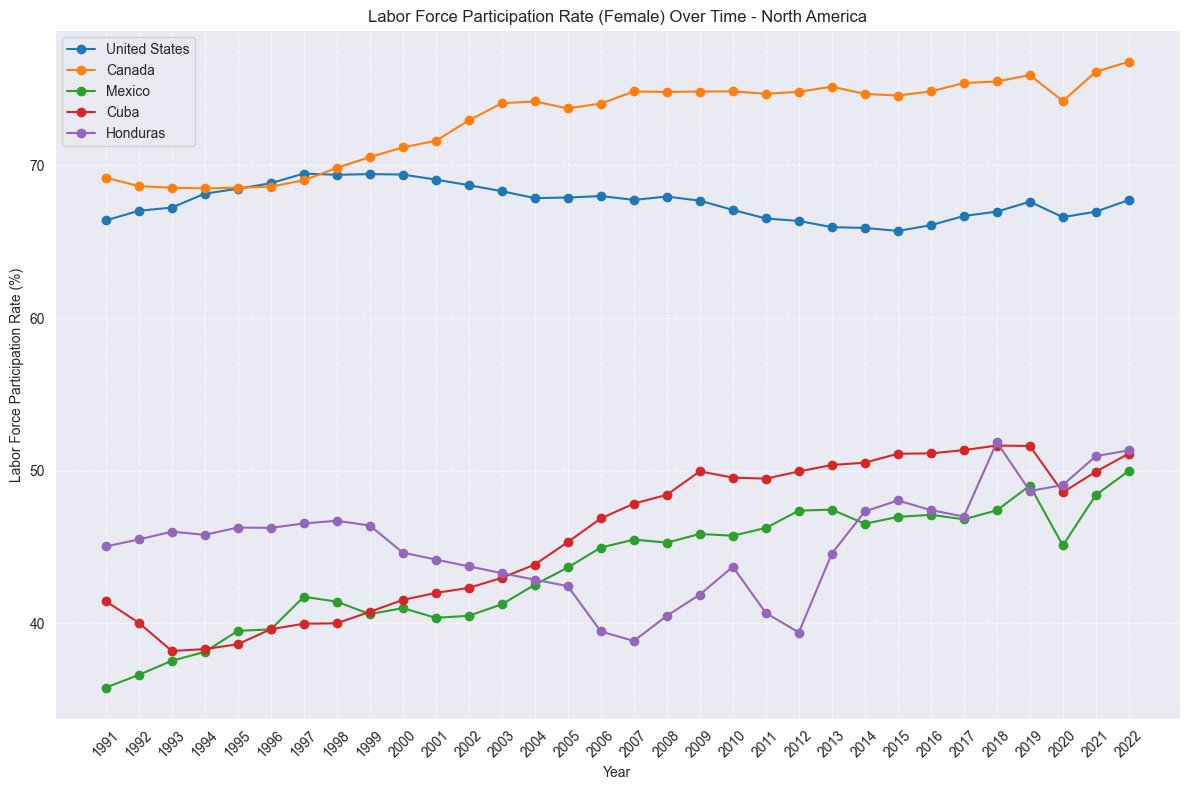

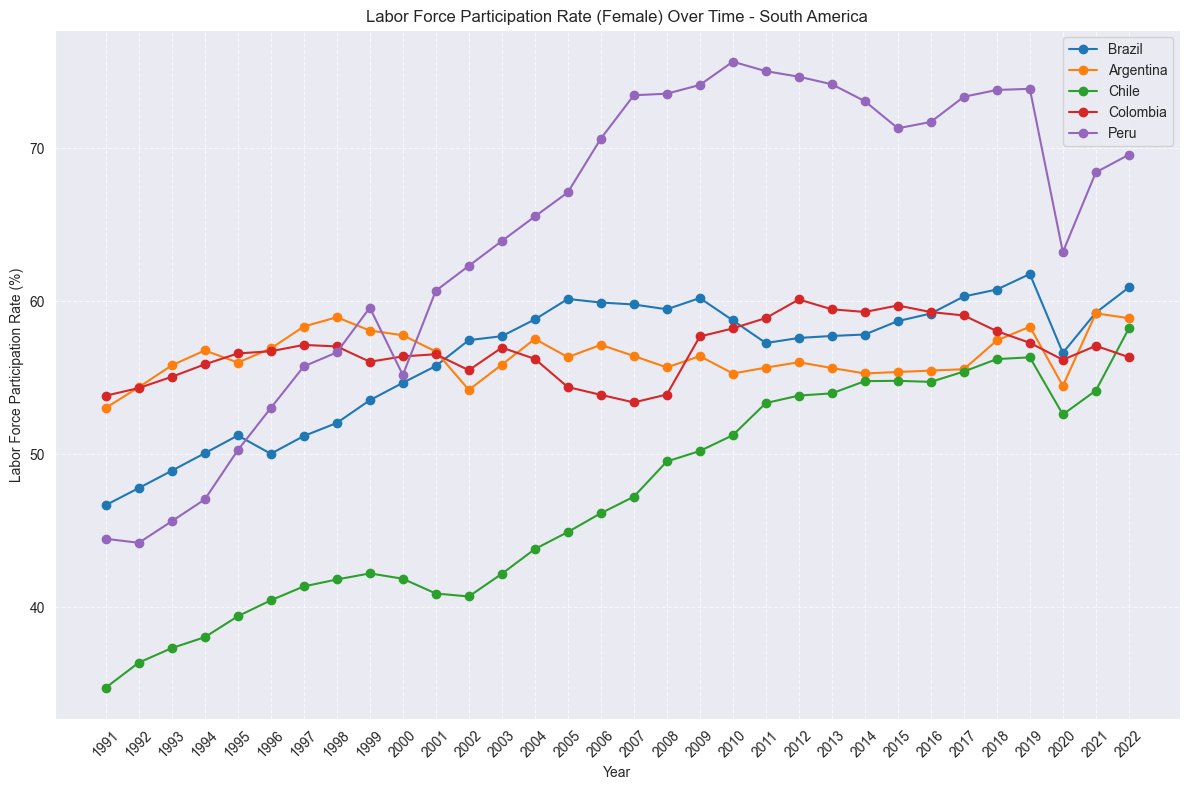

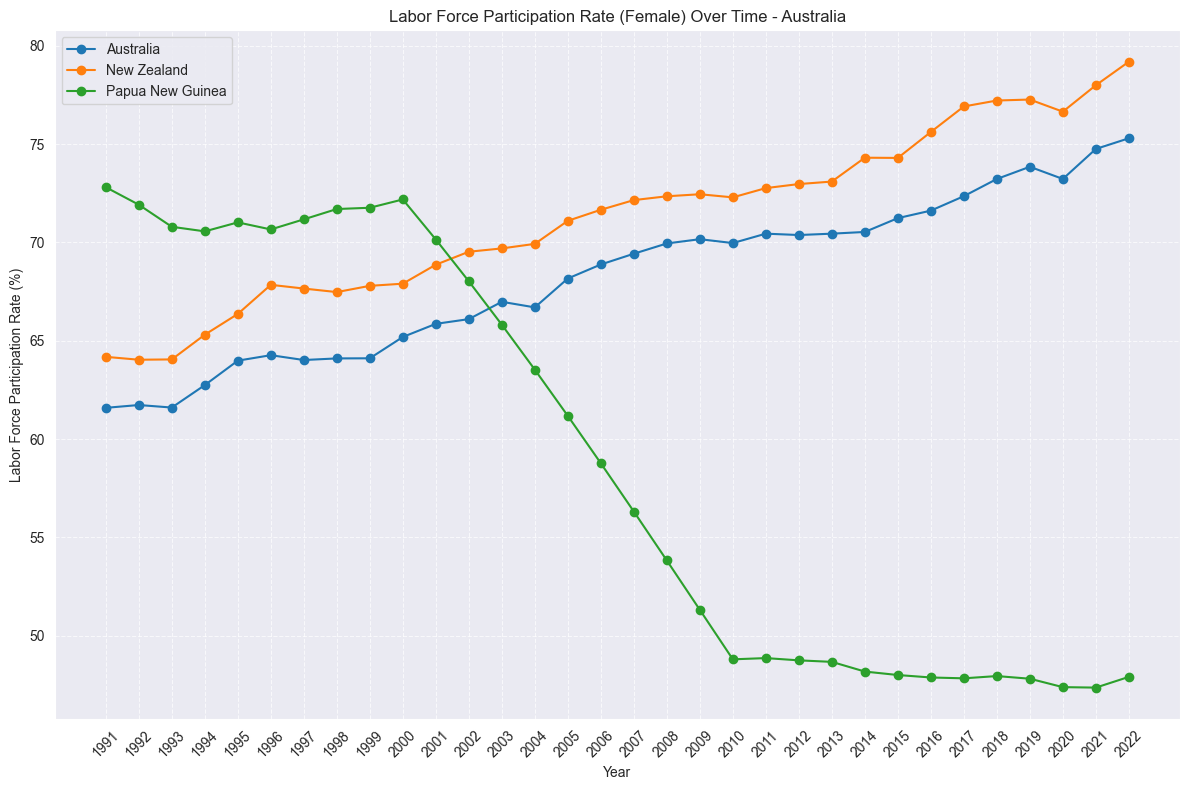

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated CSV file
file_path = '/Users/rayenchouaibi/Desktop/projekt/updated_ds1.csv'
data = pd.read_csv(file_path)

# Ensure numeric columns are treated as numeric
numeric_columns = data.columns[1:]  # Exclude 'Country Name'
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Define countries by continent
european_countries = ['France', 'Germany', 'Italy', 'Spain', 'United Kingdom']
african_countries = ['Nigeria', 'South Africa', 'Kenya', 'Ghana', 'Ethiopia']
asian_countries = ['China', 'India', 'Japan', 'South Korea', 'Indonesia']
north_american_countries = ['United States', 'Canada', 'Mexico', 'Cuba', 'Honduras']
south_american_countries = ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru']
australian_countries = ['Australia', 'New Zealand', 'Papua New Guinea']

# Function to plot trends for a given set of countries
def plot_trends(continent_name, countries):
    plt.figure(figsize=(12, 8))
    colors = plt.get_cmap('tab10')(range(len(countries)))  # Updated method

    for i, country in enumerate(countries):
        country_data = data[data['Country Name'] == country]
        if not country_data.empty:
            plt.plot(data.columns[1:], country_data.values.flatten()[1:],
                     marker='o', linestyle='-', color=colors[i], label=country)

    plt.title(f'Labor Force Participation Rate (Female) Over Time - {continent_name}')
    plt.xlabel('Year')
    plt.ylabel('Labor Force Participation Rate (%)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot for each continent
plot_trends('Europe', european_countries)
plot_trends('Africa', african_countries)
plot_trends('Asia', asian_countries)
plot_trends('North America', north_american_countries)
plot_trends('South America', south_american_countries)
plot_trends('Australia', australian_countries)


### Median Progression Calculation and Visualization:

Calculates median progression of labor force participation rates for selected groups of countries and displays the results.

Visualizes median labor force participation rates across continents using a bar chart.

Continent
Africa           67.138
Asia             62.765
Australia        75.299
Europe           71.757
North America    51.330
Other            58.029
South America    58.900
Name: 2022, dtype: float64


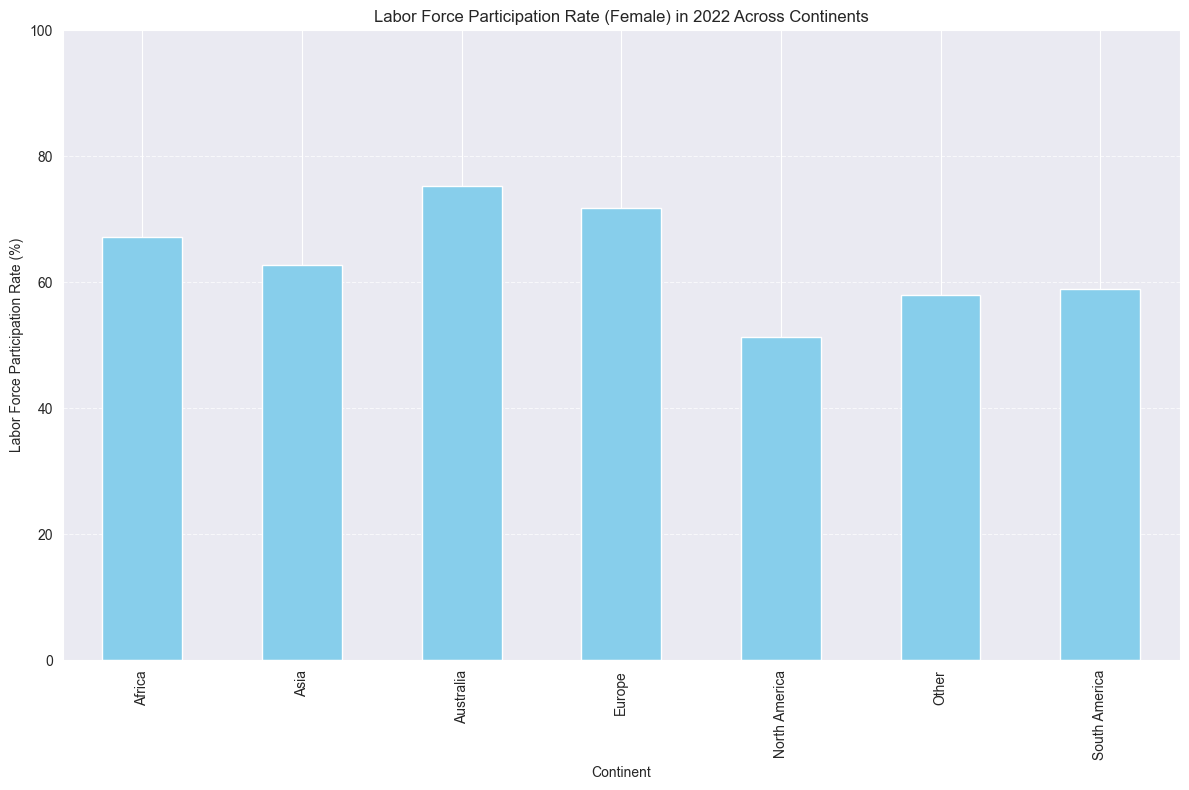

In [6]:
# Extract the data for the year 2022
data_2022 = data[['Country Name', '2022']].copy()

# Add a continent column based on country name
def get_continent(country):
    if country in european_countries:
        return 'Europe'
    elif country in african_countries:
        return 'Africa'
    elif country in asian_countries:
        return 'Asia'
    elif country in north_american_countries:
        return 'North America'
    elif country in south_american_countries:
        return 'South America'
    elif country in australian_countries:
        return 'Australia'
    else:
        return 'Other'

data_2022['Continent'] = data_2022['Country Name'].apply(get_continent)

# Calculate the median for each continent
median_2022 = data_2022.groupby('Continent')['2022'].median()

# Display the median for each continent
print(median_2022)

# Plotting histogram for the year 2022
plt.figure(figsize=(12, 8))
median_2022.plot(kind='bar', color='skyblue')
plt.title('Labor Force Participation Rate (Female) in 2022 Across Continents')
plt.xlabel('Continent')
plt.ylabel('Labor Force Participation Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 100)  # Optional: Set the y-axis limit for better visualization
plt.tight_layout()
plt.show()


Analyzes and visualizes labor force participation rate trends over time for Arabic countries.

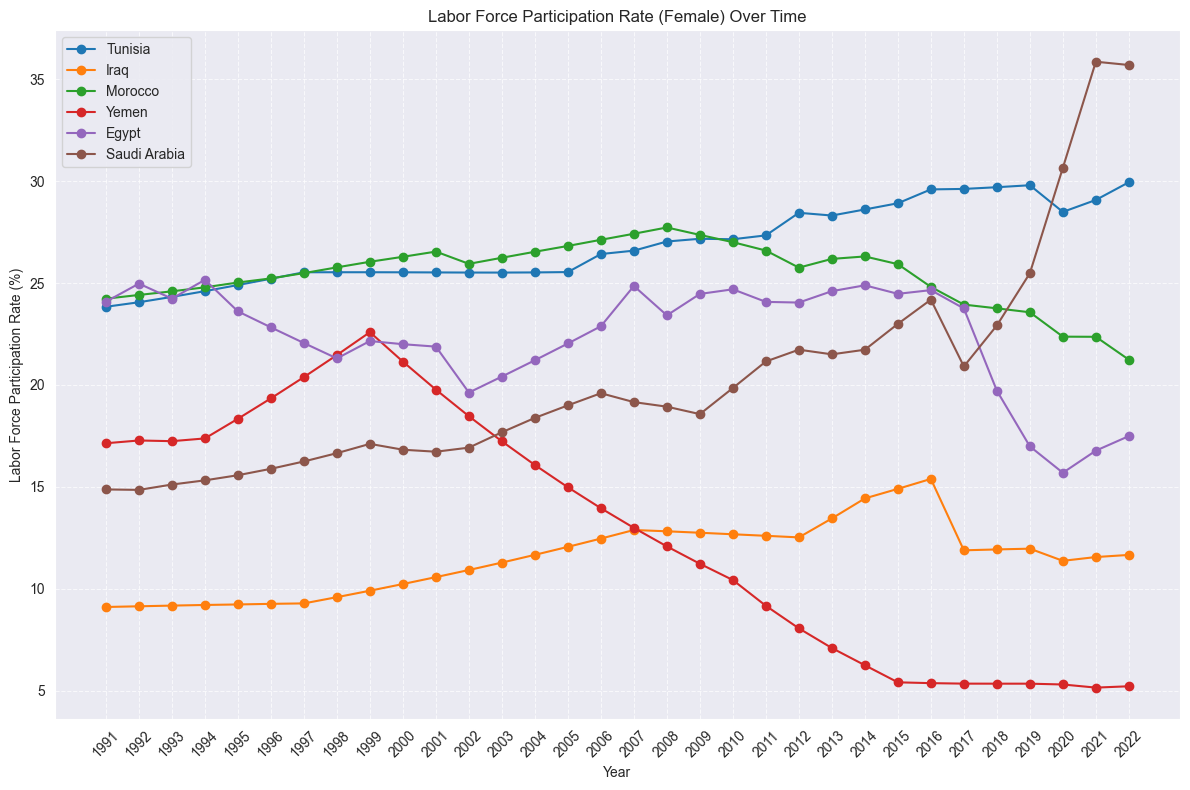

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated CSV file
file_path = '/Users/rayenchouaibi/Desktop/projekt/updated_ds1.csv'
data = pd.read_csv(file_path)

# Ensure numeric columns are treated as numeric
numeric_columns = data.columns[1:]  # Exclude 'Country Name'
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Select Arabic-speaking countries
arabic_countries = {
    'Tunisia': 'Tunisia',
    'Iraq': 'Iraq',
    'Morocco': 'Morocco',
    'Yemen': 'Yemen, Rep.',
    'Egypt': 'Egypt, Arab Rep.',
    'Saudi Arabia': 'Saudi Arabia',
}

# Plotting trends for selected countries
plt.figure(figsize=(12, 8))

# Define color palette for each country
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# Plot each country's data
for i, (country_name, country_label) in enumerate(arabic_countries.items()):
    country_data = data[data['Country Name'] == country_label]
    plt.plot(data.columns[1:], country_data.values.flatten()[1:], marker='o', linestyle='-',
             color=colors[i], label=f"{country_name}")

plt.title('Labor Force Participation Rate (Female) Over Time')
plt.xlabel('Year')
plt.ylabel('Labor Force Participation Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Percentage of Biology Degrees Awarded by Gender:

Plots the percentage of biology degrees awarded to women versus men in the USA over time.

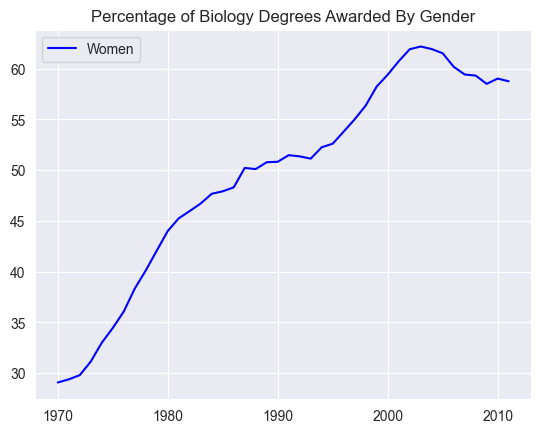

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('/Users/rayenchouaibi/Desktop/Projekt-RC/percent-bachelors-degrees-women-usa.csv')
plt.plot(women_degrees['Year'], women_degrees['Biology'],
         c='blue', label='Women')
plt.legend(loc='upper left')
plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

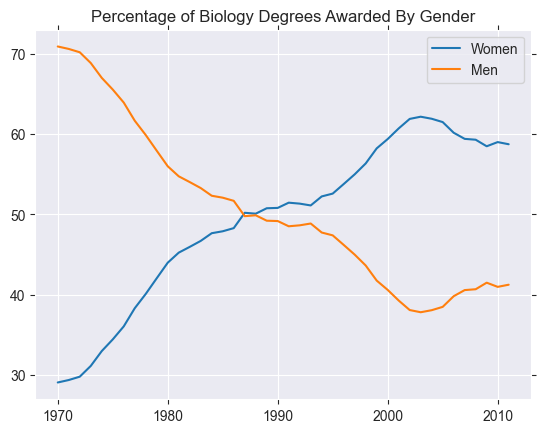

In [9]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], label='Men')

ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.legend(loc="upper right")

plt.show()

### Degrees by Gender Breakdown:

Displays line charts depicting the breakdown of degrees awarded by gender across various fields of study.

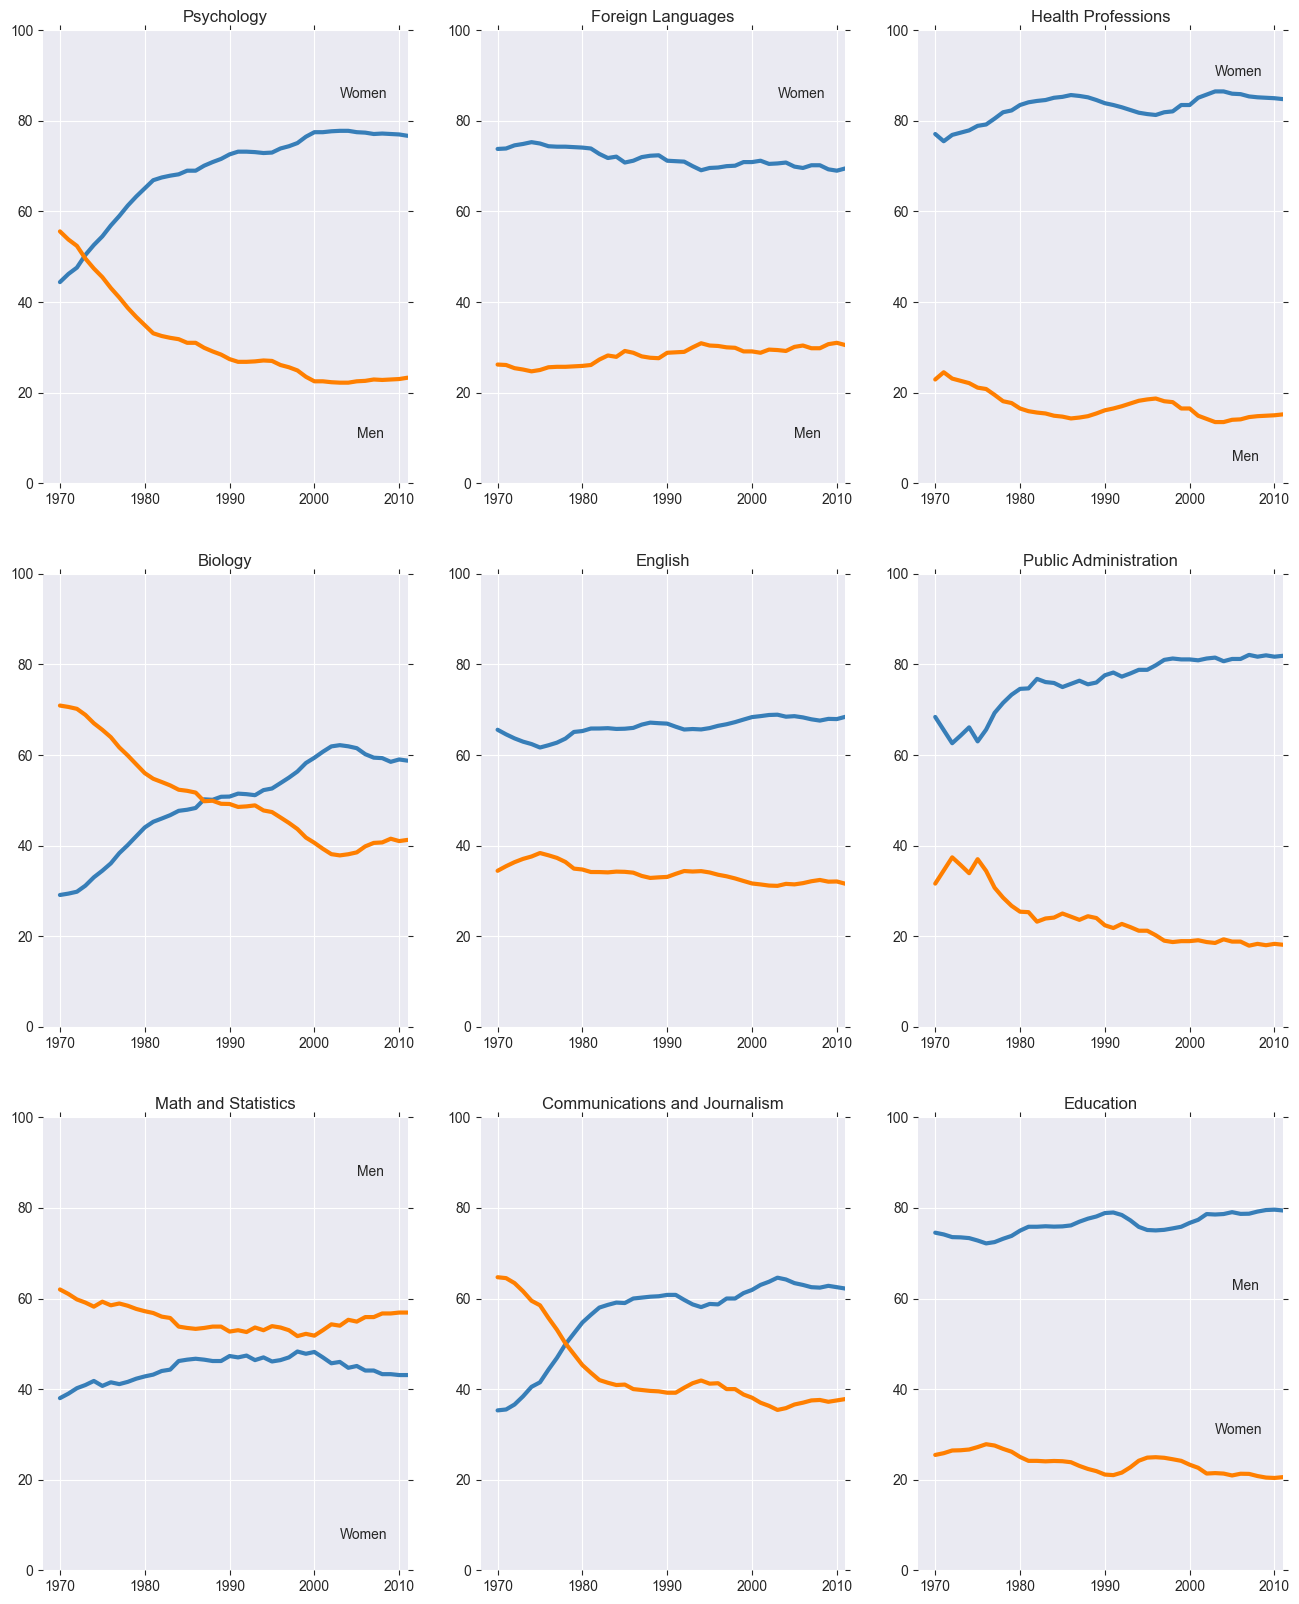

In [10]:
import matplotlib.pyplot as plt

# Define the color variables
cb_dark_blue = '#377eb8'
cb_orange = '#ff7f00'

# Define the categories
stem_cats = ['Psychology', 'Biology', 'Math and Statistics']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism']
other_cats = ['Health Professions', 'Public Administration', 'Education']

fig = plt.figure(figsize=(16, 20))

## Generate first column of line charts. STEM degrees.
for sp in range(0, 9, 3):
    cat_index = int(sp / 3)
    ax = fig.add_subplot(3, 3, sp + 1)
    ax.plot(women_degrees["Year"], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees["Year"], 100 - women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

    if cat_index == 0:
        ax.text(2003, 85, "Women")
        ax.text(2005, 10, 'Men')
    elif cat_index == 2:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')

## Generate second column of line charts. Liberal arts degrees.
for sp in range(1, 10, 3):
    cat_index = int((sp - 1) / 3)
    ax = fig.add_subplot(3, 3, sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)

    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

    if cat_index == 0:
        ax.text(2003, 85, "Women")
        ax.text(2005, 10, 'Men')

## Generate third column of line charts. Other degrees.
for sp in range(2, 11, 3):
    cat_index = int((sp - 2) / 3)
    ax = fig.add_subplot(3, 3, sp + 1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 2:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')

plt.show()


### Pie Charts for Degree Categories:

Generates pie charts to compare the percentages of women and men receiving degrees in different categories for a specific year.

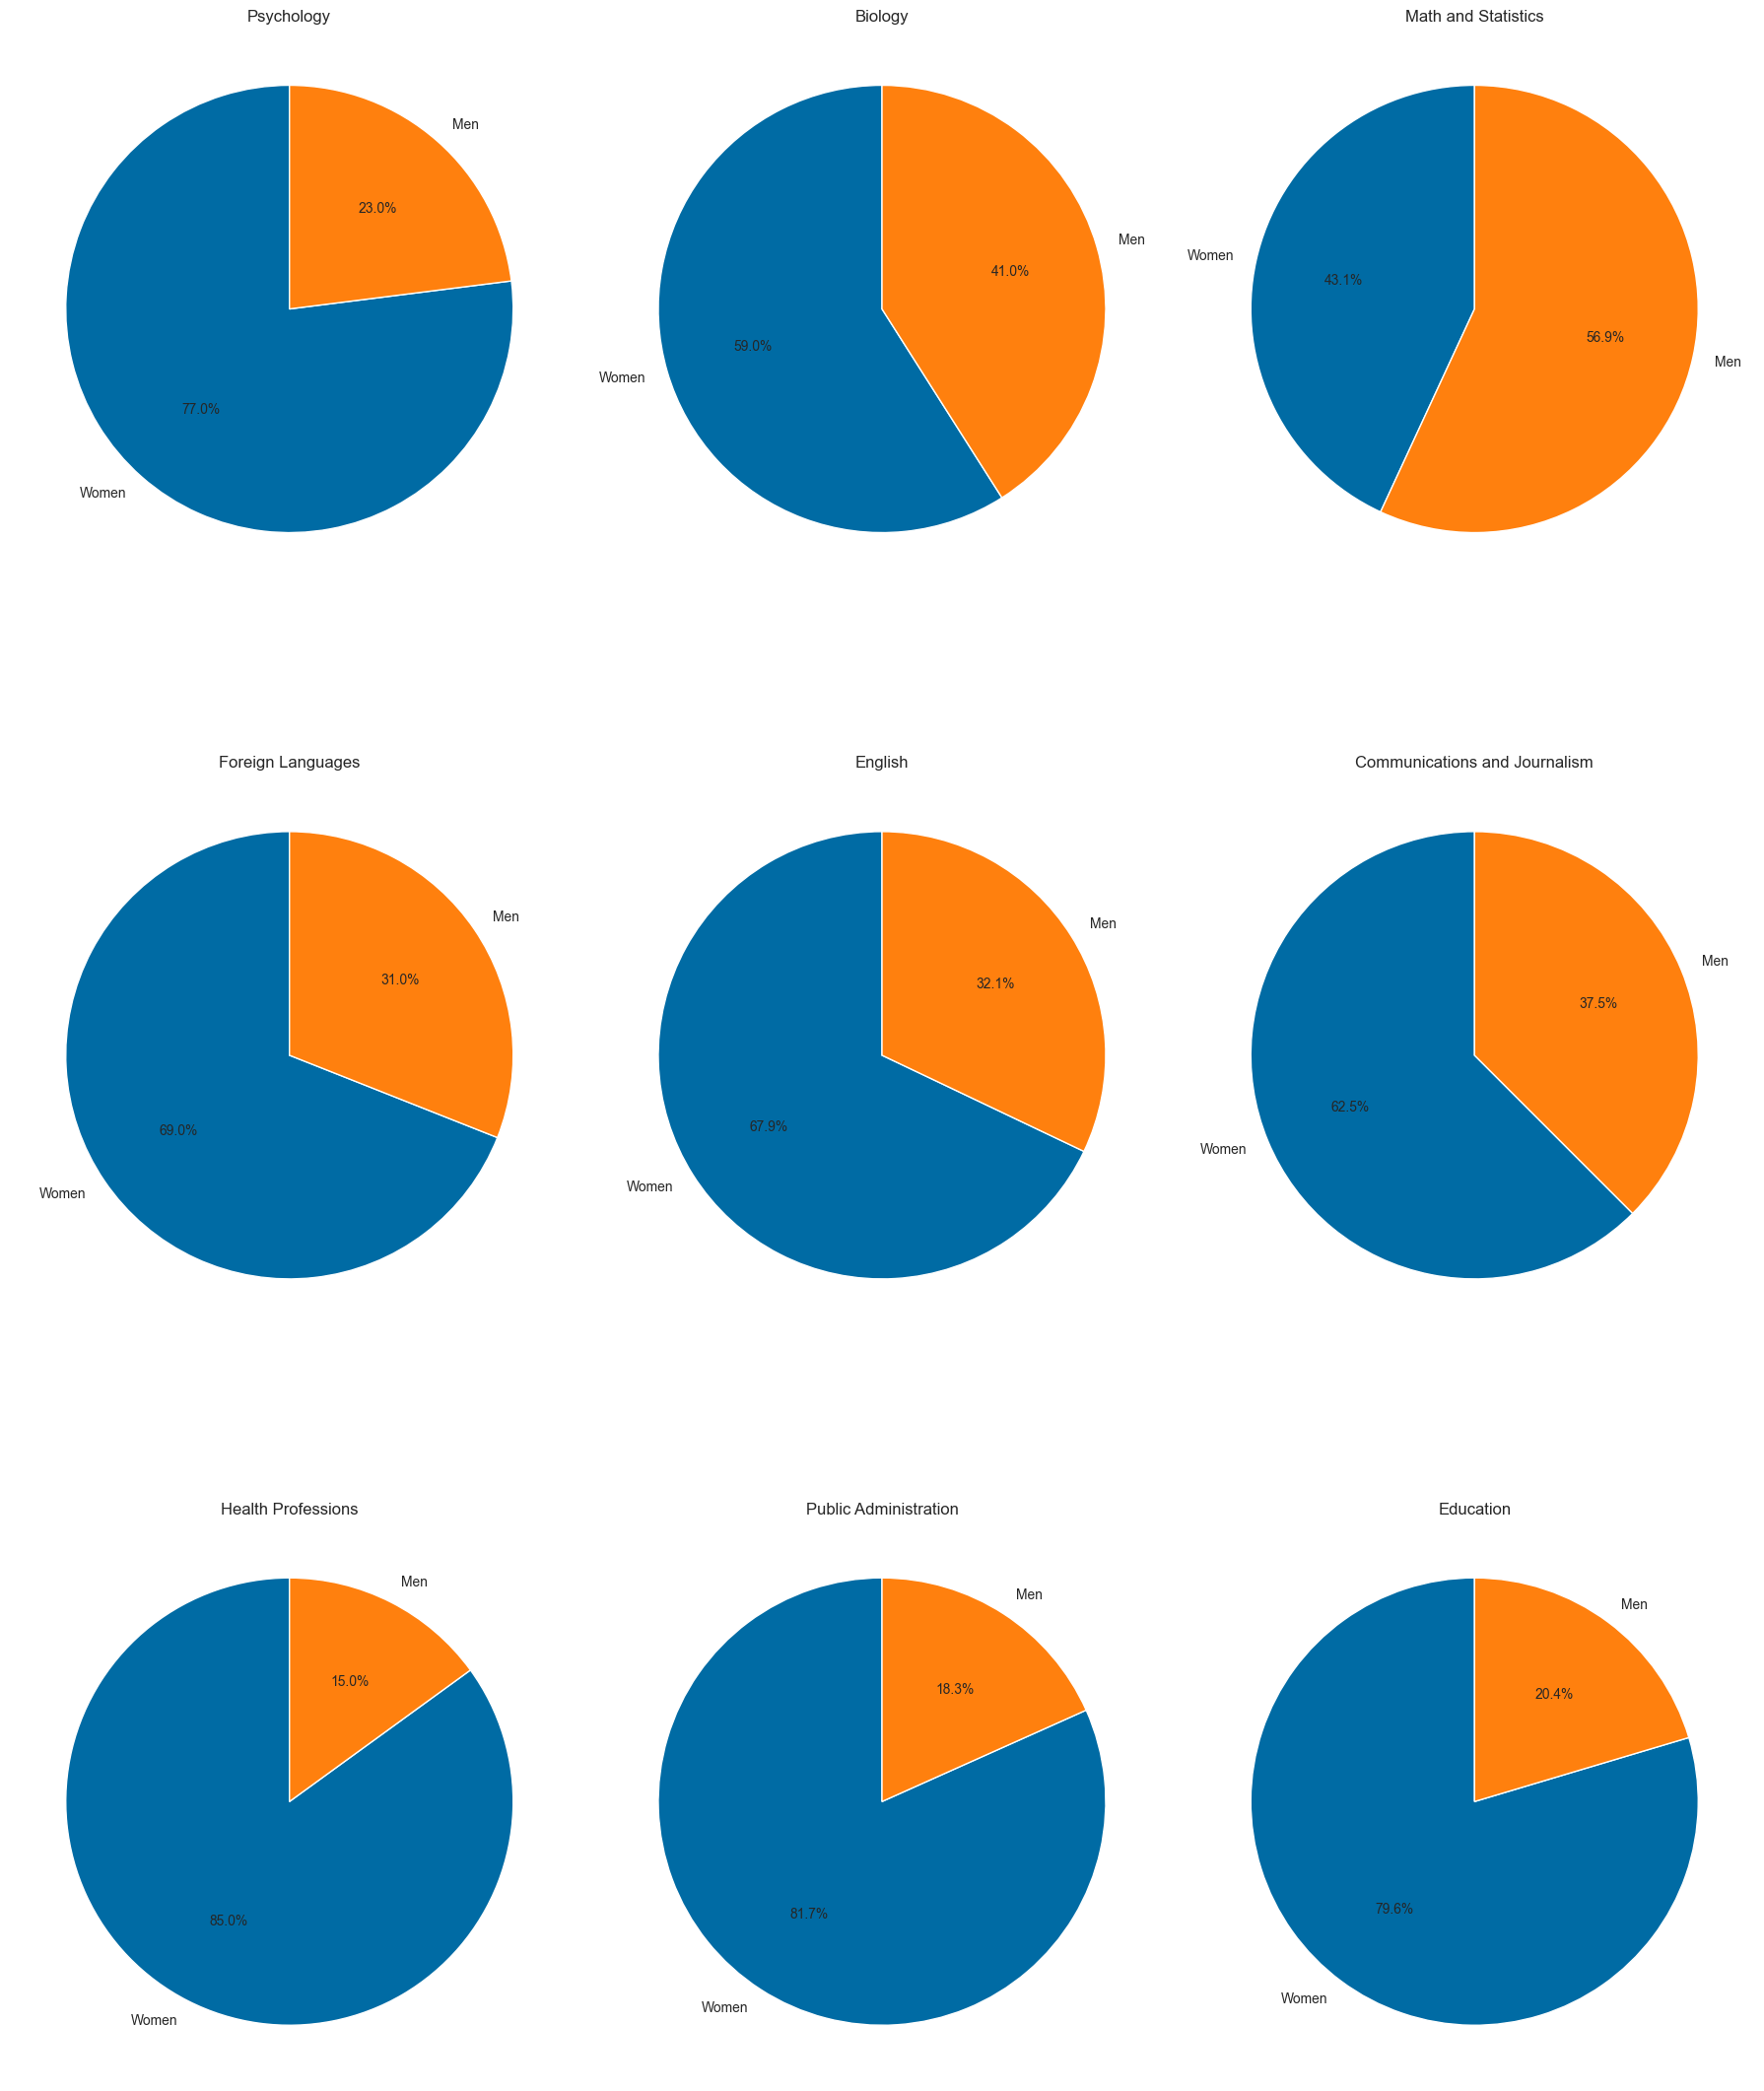

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/rayenchouaibi/Desktop/Projekt-RC/percent-bachelors-degrees-women-usa.csv'
data = pd.read_csv(file_path)

# Ensure numeric columns are treated as numeric
data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Filter data for the year 2010
data_2010 = data[data['Year'] == 2010]

# Extract data for the required categories
categories = [
    'Psychology', 'Biology', 'Math and Statistics',  # STEM
    'Foreign Languages', 'English', 'Communications and Journalism',  # Liberal Arts
    'Health Professions', 'Public Administration', 'Education'  # Other
]

# Colors for plotting
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

# Create a figure with a specific size
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 24))

# Flatten axes for easy iteration
axes = axes.flatten()

# Generate pie charts for each category
for i, category in enumerate(categories):
    ax = axes[i]
    women_percentage = data_2010[category].values[0]
    men_percentage = 100 - women_percentage
    sizes = [women_percentage, men_percentage]
    labels = ['Women', 'Men']
    ax.pie(sizes, labels=labels, colors=[cb_dark_blue, cb_orange], autopct='%1.1f%%', startangle=90)
    ax.set_title(category)

# Remove any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Linear Regression Prediction:

Performs linear regression to predict future percentages of women in a specified field of study, visualizing current and predicted trends using pie charts

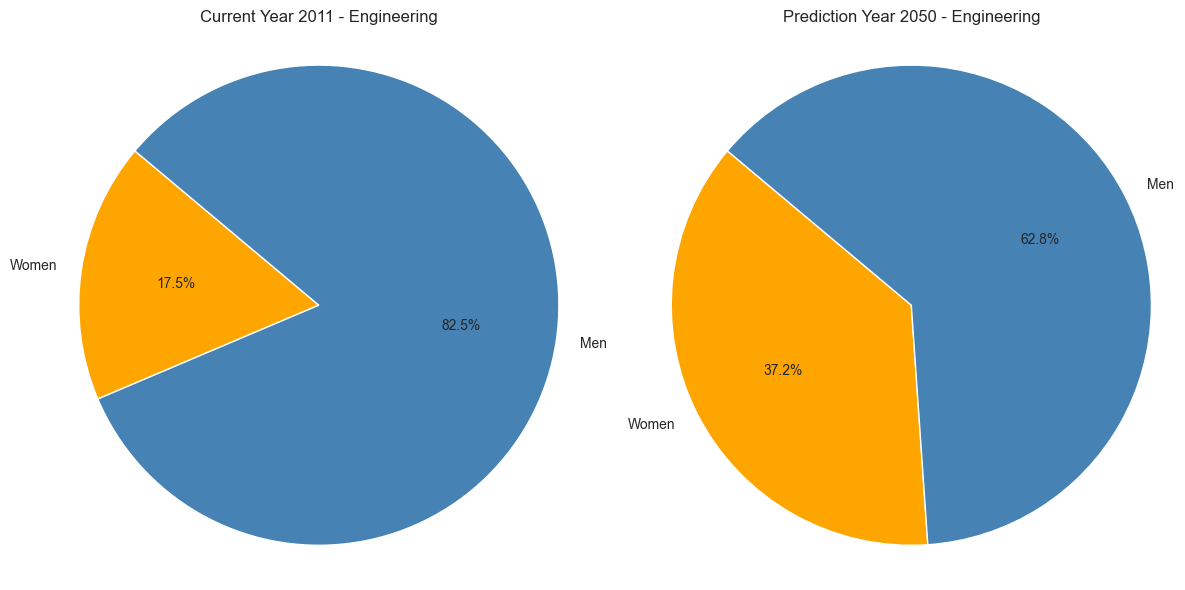

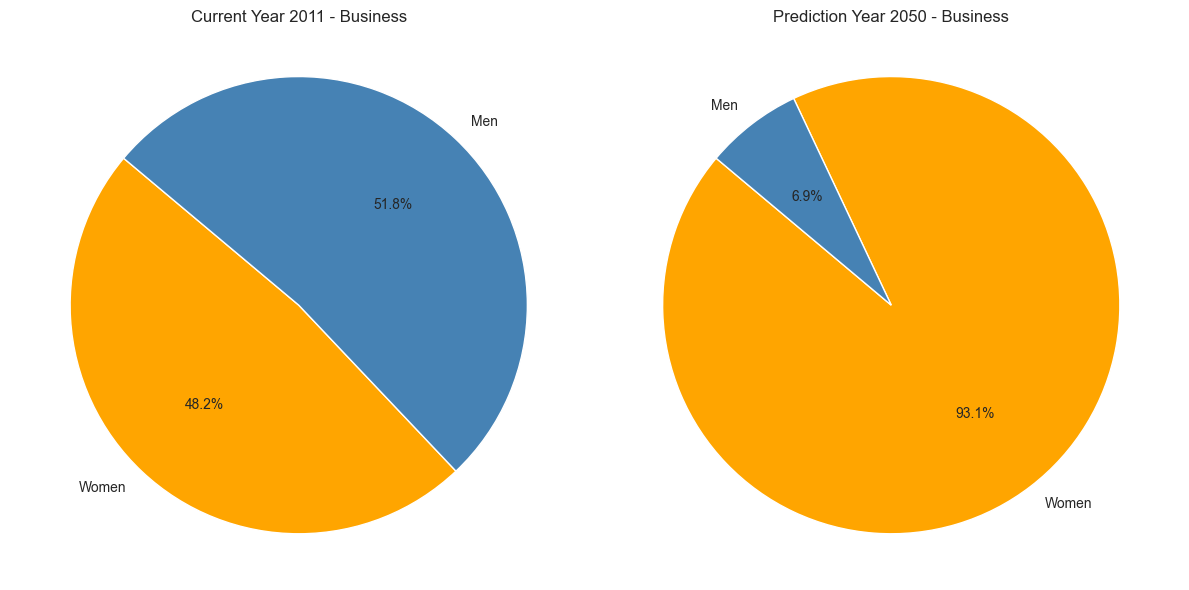

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Function to train and predict using linear regression
def predict_future_percentage(data, target_column, future_year):
    X = data[['Year']]  # Ensure X is a DataFrame
    y = data[target_column]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Predict for future year
    future_X = pd.DataFrame([future_year], columns=['Year'])  # Ensure future_X is a DataFrame with named column
    future_prediction = model.predict(future_X)

    return future_prediction[0]

# Example usage and visualization:
def visualize_prediction(data, target_column, future_year):
    current_year = data['Year'].max()

    # Get current percentage of women and men
    current_women_percentage = data[data['Year'] == current_year][target_column].values[0]
    current_men_percentage = 100 - current_women_percentage

    # Get predicted percentage of women and men for future year
    predicted_women_percentage = predict_future_percentage(data, target_column, future_year)
    predicted_men_percentage = 100 - predicted_women_percentage

    # Prepare data for pie chart
    labels = ['Women', 'Men']
    current_percentages = [current_women_percentage, current_men_percentage]
    predicted_percentages = [predicted_women_percentage, predicted_men_percentage]

    # Define colors (orange for women, blue for men)
    colors = ['#FFA500', '#4682B4']

    # Plotting pie chart for current year
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.pie(current_percentages, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Current Year {current_year} - {target_column}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Plotting pie chart for future year
    plt.subplot(1, 2, 2)
    plt.pie(predicted_percentages, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Prediction Year {future_year} - {target_column}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.tight_layout()
    plt.show()
# Example usage with data for 'Engineering' and 'Business'
engineering_data = women_degrees[['Year', 'Engineering']]
business_data = women_degrees[['Year', 'Business']]
# Example usage:
visualize_prediction(engineering_data, 'Engineering', 2050)
visualize_prediction(business_data, 'Business', 2050)


In [13]:
print("╔════════════════════════════════════╗")
print("║      Made by: Rayen Chouaibi       ║")
print("╚════════════════════════════════════╝")


╔════════════════════════════════════╗
║      Made by: Rayen Chouaibi       ║
╚════════════════════════════════════╝
